<a href="https://colab.research.google.com/github/ErichJohann/inferencia-estatisca/blob/main/T2_inf_Est.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 2</center></h1>

- Nome completo: Erich Johann Costa de Carvalho
- [Link Vídeo]()


In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_1samp
import seaborn as sns

# 1 Máquina desregulada?
 Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada
 garrafa com 500 ml de vinho. O fabricante suspeita de que essa máquina está preenchendo
 as garrafas com valores a menor. Ele então coleta uma amostra de 20 garrafas preenchidas a
 partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados
 obtidos nessas medições estão a seguir (valores em miligramas):

 484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59, 502.85, 538.08,
 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27

 Nessa parte do trabalho você deve verificar a alegação de que a máquina está desregulada,
 conforme a suspeita do fabricante.

### (i) Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamosem nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição aproximadamente normal. Para a amostra fornecida verifique essa hipótese usando doisdos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste usando QQ-plot. Nessa verificação defina o nível de significância como α = 0.05.

In [ ]:
data = [484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59,
        502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27]

stat, p_value = stats.shapiro(data)
print(p_value)

0.8223267659331017


h0: Amostra provém de uma distribuição normal

h1: A amostra não provém de uma distribuição normal

Como p > 0.05 não rejeitamos h0, ou seja a amostra não apresenta evidência contra a normalidade.

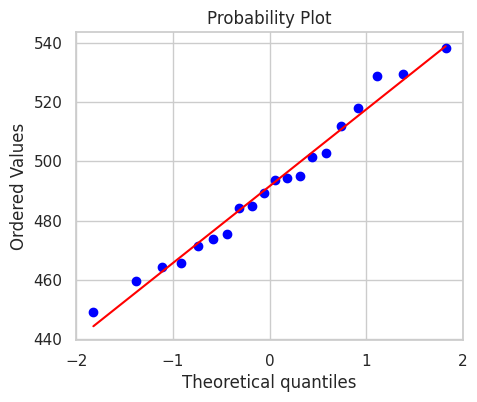

In [ ]:
plt.figure(figsize=(5,4))
stats.probplot(data, dist="norm", plot=plt)
plt.show()

Como os pontos não se distanciam muito da linha vermelha, mantendo-se bem próximos a distribuição pode ser considerada normal.

### (ii) Agora, aplique o teste de hipóteses. Repare que a variância da população é desconhecida; sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%. Apresente e descreva claramente a aplicação dos quatro passos do procedimento.

In [ ]:
x = np.array(data)
n = len(x)

x_bar = np.mean(data)
s = np.std(data, ddof=1)
t_calc = (x_bar - 500) / (s / np.sqrt(n))

p_valor = stats.t.cdf(t_calc, df=n-1)

print(f"média amostral: {x_bar}")
print(f"desvio padrão amostral: {s}")
print(f"t calculado: {t_calc}")
print(f"p valor: {p_valor}\n")

if p_valor < 0.01:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

média amostral: 491.5705
desvio padrão amostral: 24.793684356048583
t calculado: -1.5204626102079257
p valor: 0.07243112641629511

Não rejeitamos a hipótese nula


1- Formulação da hipótese:

Hipótese nula (h0) - A máquina não está desregulada, a média de ml nas garrafas é 500. μ = 500

Hipótese alternativa (h1) - A máquina está desregulada enchendo menos que 500ml por garrafa. μ < 500


2- Cálculo das estatísticas:

Como a mostra é pequena (n < 30) e o desvio padrão é desconhecido usamos teste T, que segue a distribuição de student, implementado a fórmula abaixo no código.
$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

3- Computar p valor associado a estatística.
Baseado no nível de significância dado = 0.01 e como queremos saber se a máquina está preenchendo abaixo do valor esperado, usamos a área da cauda à esquerda.

4- Tomamos a decisão. Se p_valor < alfa, no caso p_valor < 0.01, rejeitamos h0, em contraste, se p_valor > 0.01, não há evidência forte o suficiente para rejeitar h0.

 # 2 Um estilo diferente ajuda?
 O conjunto de dados fornecido no arquivo golfe.csv lista as pontuações de uma rodada para 75 membros selecionados aleatoriamente em um campo de golfe, primeiro usando seus próprios tacos originais e, dois meses depois, usando novos tacos com um estilo (design) experimental. Queremos verificar a alegação de que esse novo estilo de taco ajuda no desempenho dos jogadores.

### (i) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [ ]:
df = pd.read_csv('golfe.csv', delimiter=';')

In [ ]:
df = pd.read_csv('golfe.csv', delimiter=';')
alpha = 0.05

old_score = df['Old Score']
new_score = df['New Score ']

_, p_value_old = stats.shapiro(old_score)
_, p_value_new = stats.shapiro(new_score)
print("Shapiro-wilk:")
print(f"new score p_value: {p_value_new:.5f}")
print(f"old score p_value: {p_value_old:.5f}")
if p_value_old < alpha or p_value_new < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

print("\nD'Agostino:")
_, p_value_old = stats.normaltest(old_score)
_, p_value_new = stats.normaltest(new_score)
print(f"new score p_value: {p_value_new:.5f}")
print(f"old score p_value: {p_value_old:.5f}")
if p_value_old < alpha or p_value_new < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

Shapiro-wilk:
new score p_value: 0.00014
old score p_value: 0.00002
Rejeitamos a hipótese nula

D'Agostino:
new score p_value: 0.00055
old score p_value: 0.00000
Rejeitamos a hipótese nula


Usando o teste de shapiro-wilk e D'Agostino implementado pela biblioteca scipy.stats o valor de p computado foi menor do que o nível de significância em ambos os casos dos dois testes. Portanto, rejeitamos a hipótese nula, pois isso indica que as observações não seguem uma distribuição normal.

###  (ii) Agora, aplique o teste de hipóteses propriamente dito. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que a variância da população não é conhecida. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%.

In [ ]:
diff = new_score - old_score
alpha = 0.01
mu = 0

x_bar = np.mean(diff)
s = np.std(diff, ddof=1)
t_calc = (x_bar - mu) / (s / np.sqrt(n))

p_valor = 2*stats.t.cdf(t_calc, df=n-1)

print(f"média amostral: {x_bar:.4f}")
print(f"desvio padrão amostral: {s:.4f}")
print(f"t calculado: {t_calc:.4f}")
print(f"p valor: {p_valor:.4f}\n")

if p_valor < 0.01:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

média amostral: -2.1333
desvio padrão amostral: 2.6678
t calculado: -3.5762
p valor: 0.0020

Rejeitamos a hipótese nula


1- Primeiro definindo as hipóteses:

Hipótese nula: Não há diferença na média dos pontos. μd = 0

Hipótese alternativa: Há uma diferença na pontuação. μd ≠ 0

2- Computando estatística de teste:

Usamos novamente o test t, pelo desvio padrão não ser conhecido.
$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

3- Calculamos o p valor associado

Como queremos saber se há uma diferença nas médias, o teste é bilateral.

4- Interpretando o resultado podemos inferir que há uma diferença entre as médias, p valor < alpha, logo rejeitamos H0

# 3 Transmissões: automática versus manual
O conjunto de dados mtcars apresenta informações sobre modelos de carros. Esse conjunto de dados contém várias variáveis. Entretanto para essa parte do trabalho, duas delas são relevantes:
- am- essa variável categórica indica o tipo de sistema de transmissão usado no modelo
 de automóvel (0 = automatic, 1 = manual). Com base nessa variável, podemos formar duas amostras independentes: veículos com transmissão automática e veículos com transmissão manual.
- mpg (miles per gallon) — variável quantitativa contínua que mede o consumo de combustível, indicando quantas milhas o veículo percorre por galão de combustível. Valores maiores indicam maior eficiência energética.

Utilizando essas informações, responda aos itens a seguir com base nos métodos estudados em aula.

 ### (i) Realize uma análise gráfica exploratória comparando o consumo médio de combustível dos dois grupos de veículos. Utilize ao menos dois tipos de gráfico (como boxplots e histogramas sobrepostos) e comente os padrões observados.

In [ ]:
df = pd.read_csv('mtcars.csv', delimiter=',')

import dos dados

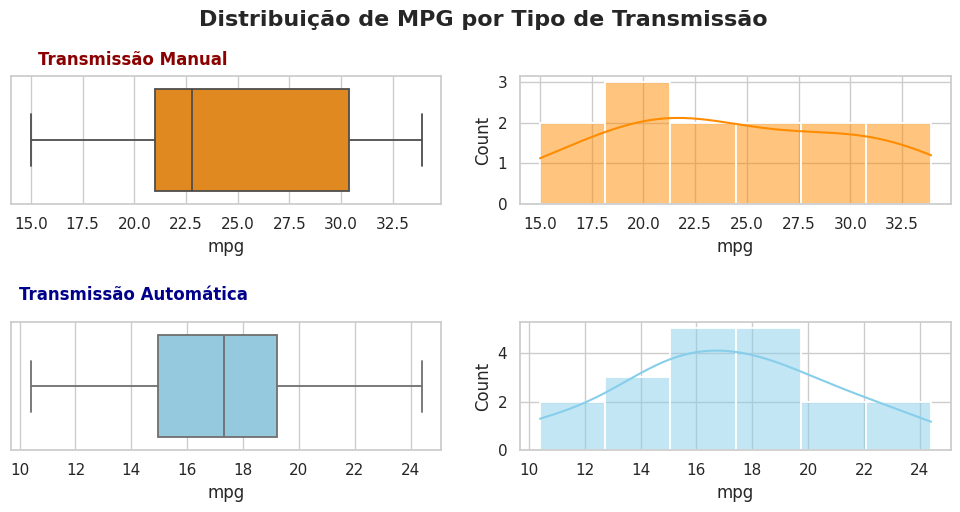

In [ ]:
manual = df[df['am'] == 1]['mpg']
auto = df[df['am'] == 0]['mpg']
sns.set_theme(style="whitegrid", palette="viridis")

fig, axes = plt.subplots(2, 2, figsize=(10,5))
sns.boxplot(x=manual, ax=axes[0,0], color='darkorange', linewidth=1.3)
sns.histplot(manual, ax=axes[0,1], color='darkorange', kde=True, bins=6, linewidth=1.3)
fig.text(x=0.15, y=0.92, s='Transmissão Manual', ha='center', va='center',
         fontsize=12, fontweight='bold', color='darkred')

sns.boxplot(x=auto, ax=axes[1,0], color='skyblue', linewidth=1.3)
sns.histplot(auto, ax=axes[1,1], color='skyblue', kde=True, bins=6, linewidth=1.3)
fig.text(x=0.15, y=0.45, s='Transmissão Automática', ha='center', va='center',
         fontsize=12, fontweight='bold', color='darkblue')

fig.suptitle('Distribuição de MPG por Tipo de Transmissão', fontsize=16, fontweight='heavy', y=1.02)
plt.tight_layout(h_pad=4.0)
plt.show()

Usando seaborn para plotar um boxplot e um histograma para comparar o consumo de gasolina por tipo de carro percebemos claramente uma maior eficiência de combustível nos carros com transmissão manual que possuem no seu intervalo interquartil bem acima dos carros com transmissão automática. Além disso o histograma demonstra a distribuição em intervalos superiores. Portanto com a análise gráfica podemos inferir que os automóveis manuais possuem eficiência energética maior que automóveis automáticos.

###  (ii) Os procedimentos paramétricos de testes de hipóteses sobre duas amostras que estudamos em nosso curso presumem que as amostras a serem usadas são provenientes de uma distribuição aproximadamente normal. Para cada uma das amostras fornecidas, verifique essa hipótese usando dois dos testes de normalidades que estudamos no curso. Para isso, use um nível de significância igual a 5%.

In [ ]:
alpha = 0.05

print("Shapiro-wilk:")
_, p_value_manual = stats.shapiro(manual)
_, p_value_auto = stats.shapiro(auto)
print(f"Auto p_value: {p_value_auto:.5f}")
print(f"Manual p_value: {p_value_manual:.5f}")

if p_value_manual < alpha or p_value_auto < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

print("\nD'Agostino:")
_, p_value_manual = stats.normaltest(manual)
_, p_value_auto = stats.normaltest(auto)
print(f"Auto p_value: {p_value_auto:.5f}")
print(f"Manual p_value: {p_value_manual:.5f}")

if p_value_manual < alpha or p_value_auto < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

Shapiro-wilk:
Auto p_value: 0.89874
Manual p_value: 0.53627
Não rejeitamos a hipótese nula

D'Agostino:
Auto p_value: 0.98702
Manual p_value: 0.51051
Não rejeitamos a hipótese nula


Ao aplicar os testes de shapiro-wilk e D'Agostino implementados pela biblioteca scipy nas duas amostras, o resultado foi p > alpha. Assim, não descartamos h0, as amostras aparentemente seguem uma distribuição normal.

###  (iii) Presumindo que os dados da coluna mpg seguem a distribuição normal, determine um intervalo de confiança no nível 95% da diferença entre as médias dos modelos de carros que possuem transmissão automática e os que possuem transmissão manual.

In [ ]:
manual_mean = np.mean(manual)
auto_mean = np.mean(auto)
diff_mean = manual_mean - auto_mean

manual_std = np.std(manual, ddof=1)
auto_std = np.std(auto, ddof=1)
alpha = 1 - 0.95

n_manual = len(manual)
n_auto = len(auto)

std_error = np.sqrt((manual_std**2 / n_manual) + (auto_std**2 / n_auto))

# Cálculo do df de Welch:
df_welch = ((manual_std**2 / n_manual + auto_std**2 / n_auto)**2) / (
    (manual_std**2 / n_manual)**2 / (n_manual - 1) +
    (auto_std**2 / n_auto)**2 / (n_auto - 1)
)

t_critical = stats.t.ppf(1 - alpha/2, df=df_welch)

lower_bound = diff_mean - t_critical * std_error
upper_bound = diff_mean + t_critical * std_error

print(f"Intervalo de confiança 95%: ({lower_bound:.5f}, {upper_bound:.5f})")

Intervalo de confiança 95%: (3.20968, 11.28019)


Primeiro é calculado as médias e a diferença das médias, além do desvio padrão das distribuições. Então é calculado o erro padrão com a fórmula abaixo para médias independentes:

$$SE_{\bar{X}_1 - \bar{X}_2} = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
$$

Assim é usado teste de Welch para amostras independentes que podem ter variâncias distintas usando a fórmula abaixo para calculo dos graus de liberdade:

$$
dfWelch = \frac{\left(\frac{(s_1)^2}{n_1} + \frac{(s_2)^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}
$$

Podendo assim calcular o valor de t e definir o intervalo de 95% de confiança.

### (iv) Suponha que, ao analisar os dados fornecidos, alguém levantou a alegação de que carros automáticos e manuais não apresentam a mesma eficiência relativa a consumo de combustível. Em particular, existe a suspeita de que carros com transmissão manual consumem (em média) menos combustível que suas contra-partidas com transmissão automática. Aplique um teste de hipóteses para verificar essa suspeita. Apresente e descreva claramente a aplicação dos quatro passos do procedimento. Repare que são fornecidas duas amostras independentes. Sendo assim, certifique-se de usar o teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 5%.

In [ ]:
alpha = 0.05
t = diff_mean / std_error
p_value = 1 - stats.t.cdf(t, df=df_welch)
print(p_value)

if p_value < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

0.0006868191665354573
Rejeitamos a hipótese nula


1 - Primeiro definindo as hipóteses:
*   Hipótese nula(h0): não há diferença no consumo de carros automáticos e manuais.
*   Hipótese alternativa(h1): Os de carros com transmissão manual tem maiot eficiência energética.

2 - Calculando estatística de teste:

t é calculado pelas variáveis computadas anteriormente (diferença das médias e erro padrão), conforme a fórmula a seguir:
$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }}
$$
3 - Calculamos o valor p

Usamos o teste unilateral a direita, já que queremos saber se a média dos carros manuais é maior.
$\mu_{manual} > \mu_{auto}$

4 - interpretação do valor

Com o nível de significância 5% o p valor é menor, assim descartamos a hipótese nula e aceitamos a alternativa. Em média os carros manuais são mais eficiêntes no consumo.

# 4 Teste ANOVA
## 4.1 Situação-problema I
 Nesta parte, você deve estudar as condições que permitem usar o método de análise de variância
 (ANOVA) para determinar se um grupo de populações tem uma média comum. Os dados
 apresentados nas figuras 1, 2 e 3 correspondem às estimativas de milhas percorridas por galão
 obtidas para amostras de modelos de carros de 1993, conforme relatado pelo Consumer Reports:
 The 1993 Cars- Annual Auto Issue (abril de 1993).

 ### (i) Se uma ou mais das amostras não passam no teste de normalidade, então não podemos usar o método ANOVA. Sendo assim, antes de poder usar esse teste, você deve verificar as condições de aplicabilidade dele. Primeiro verifique, se as amostras são aproximadamente normalmente distribuídas. Em seguida, usando o teste de Levene, verifique se as amostras possuem variâncias iguais do ponto de vista estatístico.

In [ ]:
compactos = np.array ([20, 25, 25, 20, 22, 22, 24, 26, 20, 24, 24, 23, 20,
 23, 21, 21])
medios = np.array ([18, 19, 22, 22, 19, 16, 21, 21, 21, 20,17, 18, 18, 17,
 19, 19, 18, 21, 23, 19, 22, 20])
grandes = np.array ([19, 16, 16, 17, 20, 20, 20, 18, 18, 19, 19, 15, 18,
 17, 15, 18, 17, 18, 18, 17])

def test_normality(data, alpha):
    print("Shapiro-wilk:")
    _, p_value = stats.shapiro(data)
    if p_value < alpha:
        print("Rejeitamos a hipótese nula→ A distribuição não é normal")
    else:
        print("Não rejeitamos a hipótese nula → A distribuição se aproxima da normal")

    print("D'Agostino:")
    _, p_value = stats.normaltest(data)
    if p_value < alpha:
        print("Rejeitamos a hipótese nula → A distribuição não é normal\n")
    else:
        print("Não rejeitamos a hipótese nula → A distribuição se aproxima da normal\n")

alpha = 0.05
print("Carros compactos")
test_normality(compactos, alpha)
print("Carros médios")
test_normality(medios, alpha)
print("Carros grandes")
test_normality(grandes, alpha)

_, p_value = stats.levene(compactos, medios, grandes)
if p_value < alpha:
    print("Rejeitamos H0 → as variâncias não são iguais.")
else:
    print("Não rejeitamos H0 → as variâncias são iguais.")

Carros compactos
Shapiro-wilk:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal
D'Agostino:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal

Carros médios
Shapiro-wilk:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal
D'Agostino:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal

Carros grandes
Shapiro-wilk:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal
D'Agostino:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal

Não rejeitamos H0 → as variâncias são iguais.


Criamos uma função a qual recebe os dados e o nível de significância, assim para cada grupo a função é chamada, realizando os testes de Shapiro-wilk e D'Agostino. Como resultado todas as amostras se apresentam como normais. Por fim, usando teste de Levene implementado pela biblioteca scipy, percebemos que a variância das amostras pode ser consideradas iguais.

### (ii) Agora que você verificou as condições aplicabilidade do ANOVA, aplique esse teste para verificar a hipótese nula de que as três populações têm médias estatisticamente iguais.Declare as hipóteses nula e alternativa. A seguir, descreva sua conclusão. Use nível de significância de 5%.

In [ ]:
f_stat, p_value = stats.f_oneway(compactos, medios, grandes)
print(f"F-statistic: {f_stat:.5f}")
print(f"p-value: {p_value:.5f}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

F-statistic: 30.64324
p-value: 0.00000
Rejeitamos a hipótese nula


Calculamos o valor p com a função f_oneway da biblioteca scipy.stats. Como p é bem menor que alpha, há evidências fortes para se descartar a hipótese nula de que as 3 amostras tem médias iguais. Portanto aceitamos a hipótese alternativa. O tamanho do carro influencia no consumo de combustível.

 ## 4.2 Situação-problema II
Em http://www.flatworldknowledge.com/sites/all/files/data9.xls, você encontra da dos que registram os custos dos materiais (livro didático, manual de solução, taxas de laboratório e assim por diante) em cada um dos dez cursos diferentes em cada um dos três assuntos diferentes, química, ciência da computação e matemática. Verifique, ao nível de significância de 1%, se os dados fornecem evidências suficientes para concluir que os custos médios nas três
 disciplinas não são todos iguais. Apresente os detalhes de aplicação todos os quatro passos do
 teste de hipóteses.

In [ ]:
df = pd.read_excel('http://www.flatworldknowledge.com/sites/all/files/data9.xls')

alpha = 0.01
math_costs = df[df["Cource"].str.startswith("MATH")]["Cost"]
comp_costs = df[df["Cource"].str.startswith("COMP")]["Cost"]
chem_costs = df[df["Cource"].str.startswith("CHEM")]["Cost"]

print("Math")
test_normality(math_costs, alpha)
print("Comp")
test_normality(comp_costs, alpha)
print("Chem")
test_normality(chem_costs, alpha)

_, p_value = stats.levene(math_costs, comp_costs, chem_costs)
if p_value < alpha:
    print("Rejeitamos H0 → as variâncias não são iguais.")
else:
    print("Não rejeitamos H0 → as variâncias são iguais.")

Math
Shapiro-wilk:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal
D'Agostino:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal

Comp
Shapiro-wilk:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal
D'Agostino:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal

Chem
Shapiro-wilk:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal
D'Agostino:
Não rejeitamos a hipótese nula → A distribuição se aproxima da normal

Não rejeitamos H0 → as variâncias são iguais.


Primeiramente é necessário saber se ANOVA pode ser aplicado, para isso são aplicados os testes de Shapiro-wilk e D'Agostino com a função implementada anteriormente para constatar a normalidade das distribuições. Além disso é usado Levene para descobrir se as variâncias são iguais. Como os testes foram bem sucedidos ANOVA pode ser aplicado.

In [ ]:
alpha = 0.01
f_stat, p_value = stats.f_oneway(math_costs, comp_costs, chem_costs)
print(f"F-statistic: {f_stat:.5f}")
print(f"p-value: {p_value:.5f}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

F-statistic: 1.41805
p-value: 0.25965
Não rejeitamos a hipótese nula


1 - Definindo as hipóteses:


*   Hipótese nula(h0): As médias das amostras é igual. $\mu_{math} = \mu_{comp} = \mu_{chem}$
*   Hipótese alternativa(h1): Há uma diferença significativa na média dos custos de ao menos uma disciplina.

2 - Então, calculamos a estatística de teste pela função f_oneway da biblioteca scipy.stats

3 - Além disso, essa função, f_oneway que recebe as 3 amostras,também retorna o valor p correspondente.

4 - Com os dados computados interpretamos o resultado. Como p > alpha não descartamos h0. Ou seja, podemos inferir que a média dos custos das 3 disciplinas é igual.


#  5 Testes Qui-quadrado
## 5.1 Distribuição χ2
Suponha que uma variável aleatória Y siga a distribuição χ2 com k graus de liberdade, isto é, Y ∼ χ2 (k). Por meio das funções apropriadas de R1 ou de Python2, compute o que se pede a seguir. Considere que k = 13.

 ### (i) Pr(Y > 2,56)

In [ ]:
k = 13
x = 2.56

p_valor = 1 - stats.chi2.cdf(x, df=k)
print(f"P(Y > 2.56) = {p_valor:.5f}")

P(Y > 2.56) = 0.99911


Usamos a função chi2.cdf da biblioteca scipy para calcular a probabilidade acumulada até o ponto com os graus de liberdade especificados e então subtraímos do total para pegar o complemento, a área a esquerda.

###  (ii) Pr(2,56 < Y < 4,87)

In [ ]:
k = 13
p = stats.chi2.cdf(4.87, df=k) - stats.chi2.cdf(2.56, df=k)
print(f"P(2.56 < Y < 4.87) = {p:.5f}")

P(2.56 < Y < 4.87) = 0.02117


Novamente usando a função chi2.cdf calculamos a área na interseção dos dois pontos.

### (iii) O valor de y tal que Pr(Y < y) = 0,95

In [ ]:
k = 13
p = 0.95

y = stats.chi2.ppf(p, df=k)
print(f"y = {y:.5f}")

y = 22.36203


Também usando a função chi2.cdf é possível calcular a área até o ponto especificado com os graus de liberdade fornecidos.

##  5.2 Teste χ2 (situação-problema I)
 Considere novamente o conjunto de dados denominado mtcars. Para este conjunto de dados, descubra se as variáveis cyl e carb são ou não dependentes. Para isso, utilize o teste χ2. Apresente o desenvolvimento, isto é, os comandos em R ou Python que você utilizou para chegar à conclusão.

In [ ]:
df = pd.read_csv('mtcars.csv', delimiter=',')
contingency_table = pd.crosstab(df['cyl'], df['carb'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

Rejeitamos a hipótese nula


Primeiro declarando as hipóteses:
- Hipótese nula(H0): As variáveis são independentes.
- Hipótese alternativa(Ha): As variáveis são associadas.

Assim, importando o dataset com pandas usamos a função crosstab para formar a tabela de contingência das variáveis 'cyl' e 'carb'.
Depois disso usamos a função chi2_contingency para calcular o valor p que no caso é menor que o nível de significância escolhido de 5%( p< alpha ). Portanto, rejeitamos a hipótese nula, as variáveis estão correlacionadas.

## 5.3 Teste χ2 (situação-problema II)
A fabricante das balinhas Zuzuba produz balinhas de diferentes cores. Esse fabricante alega que cada pacote produzido contém quantidades de balinhas de cada cor que não diferem significativamente das que são apresentadas na segunda coluna da tabela Tabela 1. Para testar essa alegação, um auditor comprou um pacote de Zuzubas em uma loja perto de sua casa e contou as quantidades de cada cor. Os dados levantados pelo auditor estão na terceira coluna da Tabela 1. Se o fabricante estiver correto, então não deve haver diferença significativa entre as quantidades de diversas cores de Zuzubas que ela alega depositar em cada pacote e as quantidades que o auditor encontrou.

### (i) Utilizando o R3 ou Python4, apresente dois gráficos de setores (pie charts), um para as quantidades esperadas e outro para as quantidades observadas de cores.


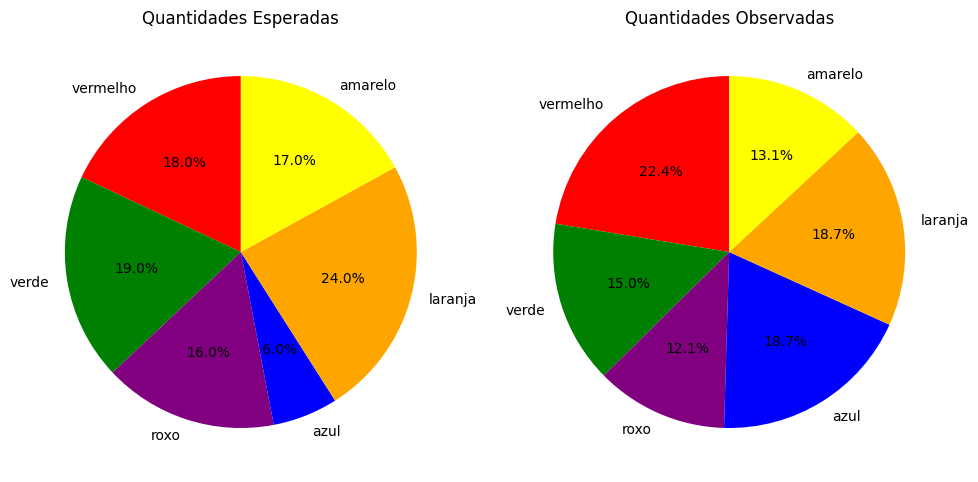

In [ ]:
df = pd.DataFrame({
    'cor': ['vermelho', 'verde', 'roxo', 'azul', 'laranja', 'amarelo'],
    'esperado': [18, 19, 16, 6, 24, 17],
    'observado': [24, 16, 13, 20, 20, 14]
})

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(df['esperado'], labels=df['cor'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'purple', 'blue', 'orange', 'yellow'])
axes[0].set_title('Quantidades Esperadas')

axes[1].pie(df['observado'], labels=df['cor'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'purple', 'blue', 'orange', 'yellow'])
axes[1].set_title('Quantidades Observadas')
plt.tight_layout()
plt.show()

Criamos um dataset correspondente com a tabela passada usando pandas então com matplotlib plotamos 2 pie charts baseados nas quantidades observadas e esperadas.

 ### (ii) Também utilizando R ou Python, teste a hipótese nula de que a alegação do fabricante é verdadeira, usando nível de significância α = 0,05. Apresente os seguintes valores: graus de liberdade, valor da estatística e o valor-p. Apresente também a sua conclusão, contra ou a favor da hipótese nula, justificando sua resposta.

In [ ]:
obs = df['observado']
expec = df['esperado']
expec_perc = df['esperado'] * (df['observado'].sum() / df['esperado'].sum())

chi2_stat, p_value = stats.chisquare(f_obs=obs, f_exp=expec_perc)
k = len(df) - 1

print(f"Chi-square statistic: {chi2_stat:.5f}")
print(f"p-value: {p_value:.5f}")
print(f"Graus de liberdade: {k}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

Chi-square statistic: 34.02704
p-value: 0.00000
Graus de liberdade: 5
Rejeitamos a hipótese nula


Hipóteses:
- $H_0$: A distribuição de cores observada não difere da alegada.
- $H_a$: A distribuição de cores observada difere da alegada.

Nível de Significância: $\alpha = 0,05$.

Primeiro ajeitamos a quantidade de zuzubas esperadas para porcentagem para terem o mesmo número de observações que as observadas. Desse jeito podemos usar a função chisquare da biblioteca scipy que retorna a estatísca χ2 e o valor p. Bastando calcular no final os graus de liberdade que é k - 1.

Por fim, interpretando o resultado, $p < \alpha$, logo descartamos a hipótese nula. A distribuição de cores das balas é diferente da que o fabricante alega.

##  5.4 Teste χ2 (situação-problema III)
 Considere um caso hipotético em que se deseja testar a eficácia de um medicamento para um
 determinado problema médico. Suponha que temos 105 pacientes em estudo e 50 deles foram
 tratados com a droga. Os restantes 55 pacientes foram mantidos como amostras de controle.
 O estado de saúde de todos os pacientes foi verificado após uma semana. Os dados e resultados
 para todos esse indivíduos podem ser encontrados no arquivo treatment.csv5.
 A tabela de contingência para o conjunto de dados fornecido pode ser produzida por meio
 dos comandos na Listagem 2 e na Listagem 3.

  Nesta situação problema, temos duas variáveis discretas, uma que indica se o paciente foi
 tratado com o medicamento (treated ou not-treated), e outra que indica se o paciente melhorou
 ou não (improved ou not-improved) Utilizando R ou Python, verifique a alegação de que as
 duas variáveis são dependentes, usando nível de significância α = 0,05.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/treatment.csv')
data_crosstab = pd.crosstab(data['treatment'], data['improvement'], margins = False)
print(data_crosstab)

alpha = 0.05
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data_crosstab)
print(f"\nChi-square statistic: {chi2_stat:.5f}")
print(f"p-value: {p_val:.5f}")

if p_val < alpha:
  print("Rejeitamos a hipótese nula")
else:
  print("Não rejeitamos a hipótese nula")

improvement  improved  not-improved
treatment                          
not-treated        26            29
treated            35            15

Chi-square statistic: 4.66257
p-value: 0.03083
Rejeitamos a hipótese nula


Hipóteses:
- $H_0$: Não há diferença entre os pacientes que usaram ou não o remédio.
- $H_a$: Pacientes que receberam o remédio tiveram uma melhora em relação aos que não receberam.

Nível de Significância: $\alpha = 0,05$.

Abrimos o csv como especificado na Listagem criamos a tabela de contingência.

Após isso usando a função chi2_contingency da biblioteca scipy.stats,  ao receber a tabela de continngência como parâmetro, ela retorna a estatística  e o valor p.

Interpretando o valor p, vemos que ele é menor que o nível de significância. $p < \alpha$. Logo rejeitamos a hipótese nula e aceitamos a alternativa. Há uma dependência entre as variáveis.

 ## 5.5 Teste χ2 (situação-problema IV)
 Em http://www.flatworldknowledge.com/sites/all/files/data4.xls, está disponível um conjunto de dados que registra o resultado de 500 arremessos de um dado de seis lados. Verifique, ao nível de significância de 10%, se há evidência suficiente para concluir que o dado não é “justo” (ou “balanceado”) ou seja, que a distribuição de probabilidade difere da probabilidade 1/6 para cada das seis faces do dado. Forneça a descrição detalhada dos quatro passos de aplicação do teste.

In [ ]:
df = pd.read_excel('http://www.flatworldknowledge.com/sites/all/files/data4.xls')

alpha = 0.1
obs = df['Die Result'].value_counts().sort_index()
n = obs.sum()
expec = [n / 6] * 6

chi2_stat, p_value = stats.chisquare(f_obs=obs, f_exp=expec)

print(f"Chi-square statistic: {chi2_stat:.5f}")
print(f"p-value: {p_value:.5f}\n")

if p_value < alpha:
  print("Rejeitamos a hipótese nula")
else:
  print("Não rejeitamos a hipótese nula")

Chi-square statistic: 2.94400
p-value: 0.70862

Não rejeitamos a hipótese nula


Hipóteses:
- $H_0$: O dado é justo, a probabilidade dos resultados é igual.
- $H_a$: O dado não é justo, há faces com maiores chances de caírem.

Com os dados importados criamos um dataset com a frequencia total para cada face dos dados observados e outro com 1/6 para cada face para os dados esperados.

Usando a função chisquare da biblioteca scipy.stats e passando como parâmetro tanto os dados observados como os esperados, é retorna o valor da estatística e o valor p.

Por fim interpretando o resultado, observamos que p é maior que o nível de signnificância, $p > \alpha$. Dessa forma não temos evidência o suficiente para descartar H0. Não podemos dizer que o dado está viciado.

# 6 Teste de Permutação
 A Figura 4 mostra os resultados de um experimento no qual 7 de 16 camundongos foram
 selecionados aleatoriamente para receber um novo tratamento médico, enquanto os 9 restantes
 foram atribuídos ao grupo sem tratamento (controle). O tratamento tinha como objetivo
 prolongar a sobrevivência após uma cirurgia de teste. Em particular, a coluna “Data” mostra
 o tempo de sobrevivência após a cirurgia, em dias, para todos os 16 camundongos. Essa mesma
 figura também apresenta, para cada amostra: tamanho, média, desvio padrão.
 Utilize o teste de permutação para responder à seguinte pergunta de pesquisa (use nível de
 significância igual a 5%): O tratamento prolongou a sobrevivência?. Você deve apresentar a
 declaração das hipóteses, descreva como calculou a estatística de deste e o p-valor, a finalmente
 apresente sua conclusão.

In [ ]:
treated = np.array([94, 197, 16, 38, 99, 141, 23])
control = np.array([52, 104, 146, 10, 50, 31, 40, 27, 46])
data = (treated, control)

result = stats.permutation_test(data, lambda x, y: np.mean(x) - np.mean(y), permutation_type='independent', n_resamples=10000, alternative='greater')
print("estatística: " + str(result.statistic))
print("p-value: " + str(result.pvalue))

if result.pvalue < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

estatística: 30.63492063492064
p-value: 0.14278572142785723
Não rejeitamos a hipótese nula


Hipóteses:
- $H_0$: Não há relação entre receber o tratamento e os dias sobrevividos após a cirurgia. $\mu_{treated} - \mu_{control} = 0$
- $H_a$: Os camundongos submetidos ao tramento tem uma expectativa de vida maior. $\mu_{treated} - \mu_{control} > 0$

Ao definir os dados como um array numpy eles são passados como uma tupla para a função permutation_test da biblioteca scipy stats. Além de receber a função usada para calcular a estatísca que é a diferença de médias, o tipo que são amostras independentes, quantidade de permutações e que o teste a ser realizado é unilateral a direita. Essa função retorna um único objeto que contém o valor da estatística e o valor p.

Como resultado tivemos $p > \alpha$, portanto não temos evidência forte o suficiente para descartar a hipótese nula. Com base nesta amostra, não foi possível concluir que o tratamento aumente significativamente o tempo de sobrevivência dos camundongos.

#  7 Bootstrap
 Essa parte do trabalho é uma adaptação do Problema 9 na seção 5.4 de An Introduction to
 Statistical Learning6. O conjunto de dados usado aqui é o denominado Boston. Uma descrição desse conjunto de dados pode ser encontrada em http://lib.stat.cmu.edu/datasets/boston.

###  (i) Com base neste conjunto de dados, forneça uma estimativa pontual para a média populacional da variável medv. Chame essa estimativa ˆµ.

In [11]:
df = pd.read_csv('Boston.csv')
medv = df['medv']
u_hat = np.mean(medv)
print(f"Média populacional de medv: {u_hat:.5f}")

Média populacional de medv: 22.53281


Importamos os dados do arquivo com pandas e calculamos a média populacional da variável medv com numpy.

### (ii) Forneça uma estimativa do erro padrão de ˆµ. Interprete o resultado.

In [ ]:
s = np.std(medv, ddof=1)
n = len(medv)
se = s / np.sqrt(n)
print(f"Erro padrão de µ_hat: {se:.5f}")

Erro padrão de µ_hat: 0.40886


Primeiro calculamos uma estimativa para o desvio padrão usando a função std da biblioteca numpy, então calculamos uma estimativa para o erro padrão seguindo a fórmula abaixo:
$$
SE_{\mu} = \frac{\sigma}{\sqrt{n}}
$$

 ### (iii) Agora estime o erro padrão de ˆµ usando o método Bootstrap. Como essa estimativa se compara com sua resposta de (ii)?

In [ ]:
B = 10000
n = len(medv)
boot_means = np.array([
    np.mean(np.random.choice(medv, size=n, replace=True))
    for _ in range(B)
])

se_boot = np.sqrt(np.sum((boot_means - np.mean(boot_means))**2) / (B - 1))
print(f"Erro padrão de µ_hat: {se_boot:.5f}")

Erro padrão de µ_hat: 0.40969


Definido o número de amostras que serão geradas com B = 10000, usamos numpy para gerar todas elas e calcular as médias. Assim com a fórmula abaixo implementada é possível calcular o erro padrão que é bem próximo do valor teórico calculado no item anterior.

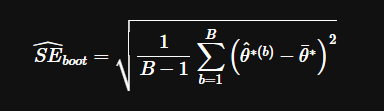

### (iv) Com base em sua estimativa de bootstrap de (iii), forneça um intervalo de confiança de 95% para a média de medv. Compare-o com os resultados obtidos usando t-test sobre o atributo medv.

In [ ]:
boot_means.sort()
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)
print(f"Intervalo de confiança de 95%: ({lower_bound:.5f}, {upper_bound:.5f})")

mean_t = np.mean(medv)
se_t = np.std(medv, ddof=1) / np.sqrt(n)
t_crit = stats.t.ppf(0.975, df=n-1)

ci_lower_t = mean_t - t_crit * se_t
ci_upper_t = mean_t + t_crit * se_t

print(f"Intervalo de confiança 95% (t-test): ({ci_lower_t:.5f}, {ci_upper_t:.5f})")

Intervalo de confiança de 95%: (21.73458, 23.34350)
Intervalo de confiança 95% (t-test): (21.72953, 23.33608)


Para o intervalo de confiança no bootstrap usamos o método de percentil. Assim calculando o t-test sobre o atributo para gerar outro intervalo de 95% de confiança é possível perceber que a diferença entre a estimativa com bootstrap e t-test se mantiveram muito próximas, comprovando a confiabilidade dos métodos.

### (v) Com base neste conjunto de dados, forneça uma estimativa, $ˆµ_{med}$, para a mediana populacional de medv.

In [ ]:
median = np.median(medv)
print(f"Mediana populacional de medv: {median:.5f}")

Mediana populacional de medv: 21.20000


Estimamos a mediana com a função median da biblioteca numpy

### (vi) Agora você deve estimar o erro padrão de ˆµmed. Infelizmente, não há uma fórmula simples para calcular o erro padrão da mediana. Em vez disso, estime o erro padrão da mediana usando o método bootstrap. Comente suas descobertas.

In [ ]:
B = 10000
n = len(medv)
boot_medians = np.array([
    np.median(np.random.choice(medv, size=n, replace=True))
    for _ in range(B)
])

se_boot = np.sqrt(np.sum((boot_medians - np.median(boot_medians))**2) / (B - 1))
print(f"Erro padrão de µ_hat: {se_boot:.5f}")

Erro padrão de µ_hat: 0.37771


Usando o bootstrap é possível gerar diversas amostras com numpy e pegar suas medianas. Desse jeito estimamos o erro padrão  de ($\hat{\mu}_{\text{med}}$) com a fórmula anterior (repetida abaixo), mas substituindo a média pela mediana, algo que seria muito complicado de fazer, especialmente para distribuições não-normais ou amostras pequenas.

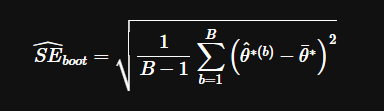

### (vii) Forneça uma estimativa para o décimo percentil do atributo medv. Chame essa quantidade de ˆµ0.1.

In [ ]:
u_01 = np.percentile(medv, 10)
print(f"Decimo percentil de medv: {u_01:.5f}")

Decimo percentil de medv: 12.75000


Usando a função percentile com parâmetro 10 podemos calcular o décimo percentil com numpy.

 ### (viii) Use o método bootstrap para estimar o erro padrão de ˆµ0.1. Comente suas descobertas.

In [9]:
B = 10000
n = len(medv)
boot_u_01 = np.array([
    np.percentile(np.random.choice(medv, size=n, replace=True), 10)
    for _ in range(B)
])

se_boot = np.sqrt(np.sum((boot_u_01 - np.mean(boot_u_01))**2) / (B - 1))
print(f"Erro padrão de µ_hat_0.1: {se_boot:.5f}")
print(f"Média 10° percentil: {np.mean(boot_u_01)}")

Erro padrão de µ_hat_0.1: 0.49771
Média 10° percentil: 12.77329


Com numpy foram geradas 10000 amostras com o método bootstrap e salvo seu 10 percentil. Após isso estimamos o erro padrão com a mesma fórmula usada anteriormente que difere bem pouco do valor calculado no item anterior. Novamente o método Bootstrap mais uma vez demonstra sua utilidade ao permitir a estimativa do erro padrão para algo complexo, para o qual não existe uma fórmula analítica simples e amplamente aplicável.

 # 8 Teste de Permutação vs Bootstrap
 Uma empresa quer saber se é eficiente ensinar novas ferramentas aos seus funcionários usando
 cursos pela internet. A empresa seleciona aleatoriamente 7 trabalhadores e os atribui a dois
 grupos de tamanhos 4 e 3. O primeiro grupo frequentou aulas tradicionais, e o segundo frequentou cursos pela internet. Após a realização dos cursos, foi aplicado um teste aos trabalhadores,
 cujos resultados foram:

*   Cursos na Internet: 37, 49, 55, 57
*   Cursos tradicionais: 23, 31, 46

 Verifique se os cursos da Internet são mais efetivos do que os cursos tradicionais. Para isso,
 aplique um teste de permutação e um teste de bootstrap. Use o nível de significância α = 0.1.
 Os dois testes levam à mesma conclusão?

In [26]:
internet = np.array([37, 49, 55, 57])
trad = np.array([23, 31, 46])
data = (internet, trad)

result = stats.permutation_test(data, lambda x, y: np.mean(x) - np.mean(y), permutation_type='independent', n_resamples=10000, alternative='greater')

print("Teste permutação:")
print(f"p-value: {result.pvalue}")
print(f"Estatística {result.statistic:.5f}")

if result.pvalue < 0.1:
  print("Rejeitamos a hipótese nula")
else:
  print("Não rejeitamos a hipótese nula")

B = 10000
data = np.concatenate((internet, trad))
obs_diff = np.mean(internet) - np.mean(trad)
mean_total = np.mean(data)

internet_centered = internet - np.mean(internet) + mean_total
trad_centered = trad - np.mean(trad) + mean_total

boot_diff = []
for _ in range(B):
  x = np.random.choice(internet_centered, size=len(internet), replace=True)
  y = np.random.choice(trad_centered, size=len(trad), replace=True)
  boot_diff.append(np.mean(x) - np.mean(y))

boot_diff.sort()
boot_diff = np.array(boot_diff)
p_value = np.mean(boot_diff >= obs_diff)

print("\nTeste bootstrap:")
print(f"p-value: {p_value}")
print(f"Estatística {np.mean(boot_diff):.5f}")

if p_value < 0.1:
    print("Rejeitamos a hipótese nula")
else:
  print("Não rejeitamos a hipótese nula")

Teste permutação:
p-value: 0.05714285714285714
Estatística 16.16667
Rejeitamos a hipótese nula

Teste bootstrap:
p-value: 0.0016
Estatística -0.09458
Rejeitamos a hipótese nula


Hipóteses:
- $H_0$: Não há diferença entre realizar o curso tradicionalmente ou pela internet.
- $H_a$: Cursos realizados pela internet são mais efetivos.

Primeiro realizamos o teste de permutação com auxilio da função permutation_test da biblioteca scipy que pelo retorno rejeita H0 com o nível de significância estipulado.

Agora, para o teste bootstrap foi necessário centralizar as distribuições, depois gerar todas as amostras bootstrap e calcular a diferença. Por fim computar o valor p com a fórmula:
$T^{*(b)} \ge T_{\text{obs}}$

Ambos os testes realizaram teste unilateral a direita e rejeitaram H0, ou seja, podemos inferir que cursos pela internet foram mais eficazes que os tradicionais.